<a href="https://colab.research.google.com/github/JohnPauAtmosfera/Elective2_DataAnalytics/blob/main/Atmosfera_Laboratory_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Mean, Median and Mode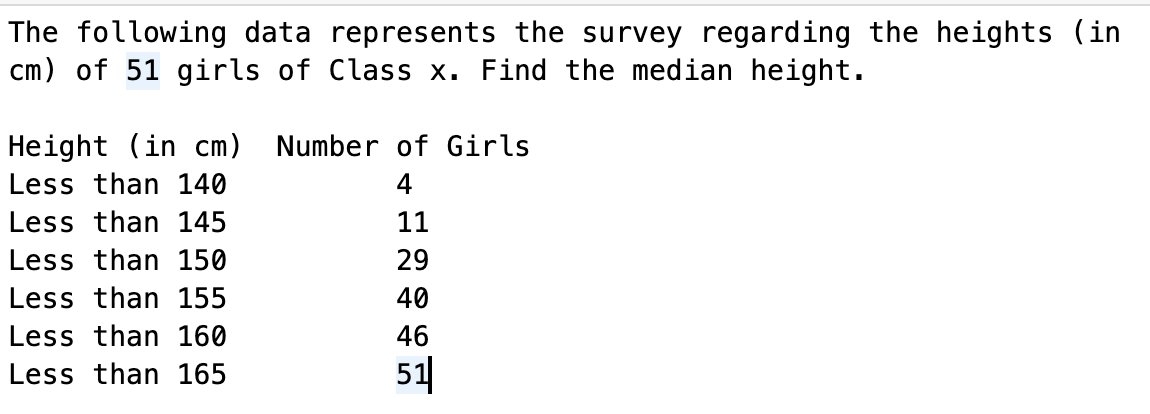

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

1. Mean

In [46]:
height_girls = [140,140,140,140,145,145,145,145,145,145,145,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,155,155,155,155,155,155,155,155,155,155,155,160,160,160,160,160,160,165,165,165,165,165]
height_girls = sorted(height_girls)
np.mean(height_girls)



152.2549019607843

2. Median

In [47]:
np.median(height_girls)

150.0

3. Mode

In [51]:
stats.mode(height_girls)

ModeResult(mode=array([150]), count=array([18]))

4. Variance

In [52]:
height_girls = [140,140,140,140,145,145,145,145,145,145,145,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,155,155,155,155,155,155,155,155,155,155,155,160,160,160,160,160,160,165,165,165,165,165]
standard_deviation = np.std(height_girls, ddof=1)
print(standard_deviation)

6.805418832826977


# Part 2: Temperature and Humidity

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataframe
df = pd.read_csv("humidity_Temperature.csv")

df.head()


,sample,date,timestamp,humidity,temperature
0,1.0,9/30/16,23:55:18,80.0,48.0
1,2.0,9/30/16,23:50:23,79.0,48.0
2,3.0,9/30/16,23:45:24,79.0,48.0
3,4.0,9/30/16,23:40:21,79.0,48.0
4,5.0,9/30/16,23:35:22,79.0,48.0


In [10]:
df = pd.read_csv('humidity_Temperature.csv')
df.describe()

,sample,humidity,temperature
count,34198.000000,35093.000000,35093.000000
mean,16786.608983,75.995508,51.052207
std,9751.957697,26.560617,6.188243
min,1.000000,8.000000,34.000000
25%,8230.250000,57.000000,46.000000
50%,16779.500000,86.000000,50.000000
75%,25328.750000,97.000000,55.000000
max,33133.000000,265.800000,71.000000


# Sorted Humidity and Temperature

In [28]:
df.humidity = sorted(df.humidity)
df.temperature = sorted(df.temperature)
sortedhumTemp = df[["humidity", "temperature"]]
sortedhumTemp.head()

,humidity,temperature
0,8.0,34.00
1,11.0,34.47
2,11.0,35.00
3,11.0,35.00
4,11.0,35.00


# Mean, Median, Mode

In [29]:
np.mean(sortedhumTemp)

humidity       75.995508
temperature    51.052207
dtype: float64

In [30]:
#median
medianHum = np.median(df.humidity)
medianTemp = np.median(df.temperature)

#print the mean & median of humidity and temperature
print("humidity \t temperature")
print(f"mean: {np.floor(np.mean(df.humidity))} \t mean: {np.floor(np.mean(df.temperature))}\nmedian: {medianHum} \t median: {medianTemp}")

humidity 	 temperature
mean: 75.0 	 mean: 51.0
median: 86.0 	 median: 50.0


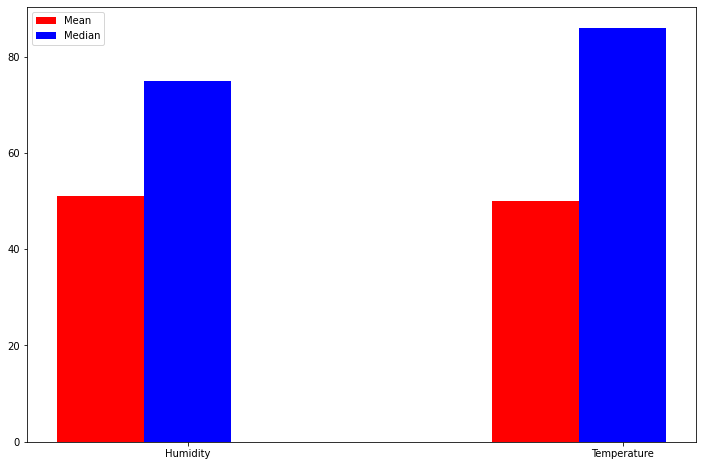

In [31]:
#bar graph for mean of temperature and humidity
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8))

temp_data = [] 
hum_data = []
tempMean = np.floor(np.mean(df.temperature))
tempMedian = np.median(df.temperature)
humMean = np.floor(np.mean(df.humidity))
humMedian = np.median(df.humidity)
hum_data.append(humMean)
hum_data.append(humMedian)
temp_data.append(tempMean)
temp_data.append(tempMedian)

br1 = np.arange(len(temp_data))
br2 = [x + barWidth for x in br1]
plt.bar(br1, temp_data, color = 'r', width = barWidth, label = "Mean")
plt.bar(br2, hum_data, color = 'b', width = barWidth, label = "Median")

plt.xticks([r + barWidth for r in range(2)],
        ['Humidity', 'Temperature'])

plt.legend()
plt.show()

In [32]:
#mode
stats.mode(df.temperature)

ModeResult(mode=array([45.]), count=array([3737]))

In [33]:
stats.mode(df.humidity)

ModeResult(mode=array([93.]), count=array([2556]))

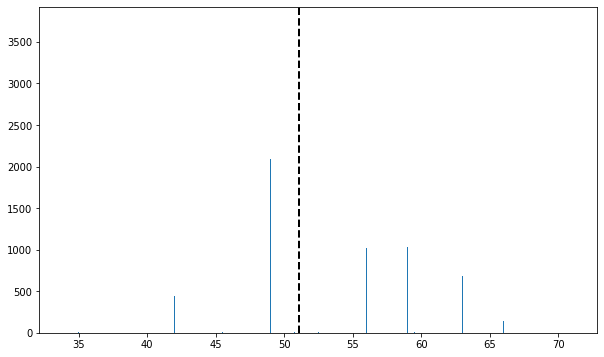

51.0


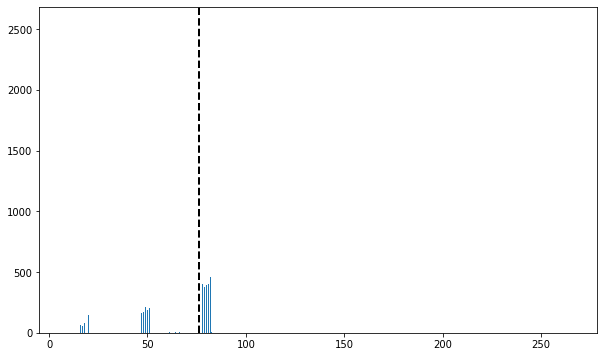

75.0


In [34]:
def plot_hist(arr):
  plt.figure(figsize=(10,6))
  plt.hist(arr, int(len(arr)*0.1))
  plt.axvline(arr.mean(), color='k', linestyle='dashed', linewidth=2)
  plt.show()
plot_hist(df.temperature)
print(np.floor(np.mean(df.temperature)))
plot_hist(df.humidity)
print(np.floor(np.mean(df.humidity)))


In [35]:
#standard deviation
print(np.std(df.temperature))
print(np.std(df.humidity))

6.188154535326642
26.56023839066726


In [36]:
np.var(df.temperature)

38.29325655308368

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


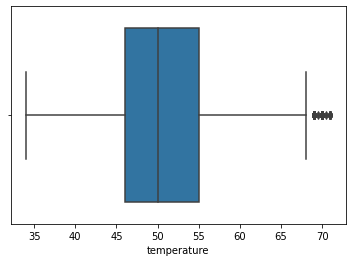

In [37]:
sns.boxplot(df.temperature)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


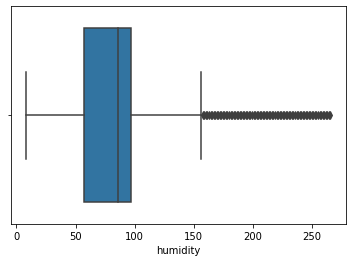

In [38]:
sns.boxplot(df.humidity)

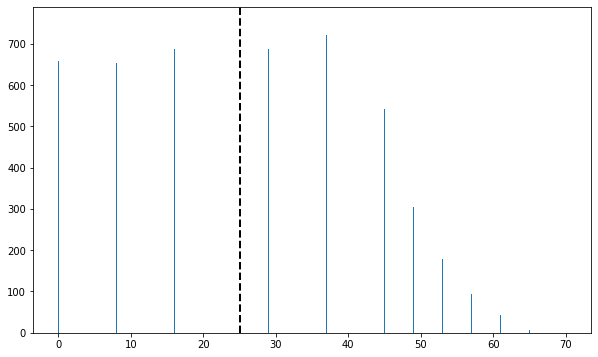

Mean: 25.05810275553529


In [39]:
temp = np.random.randint(df.temperature)
plot_hist(temp)
print(f"Mean: {temp.mean()}")

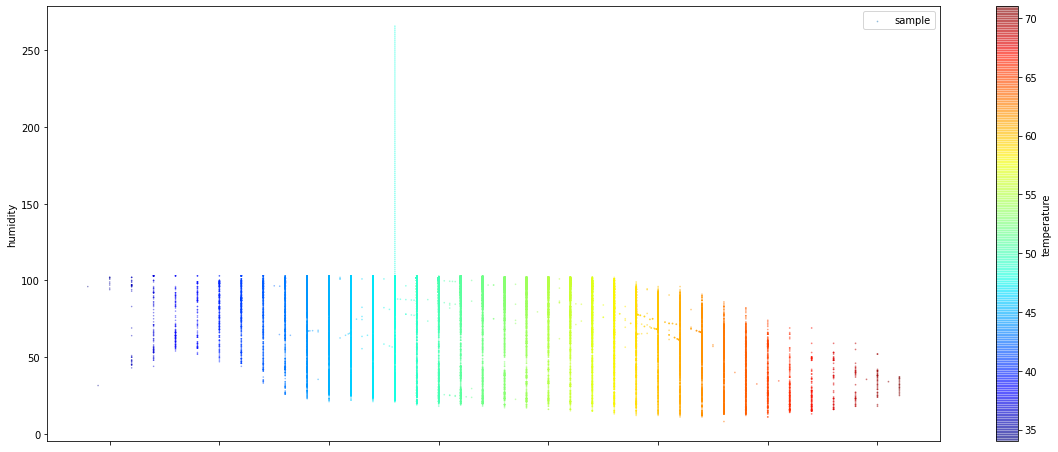

In [27]:
df.plot(kind="scatter", x = "temperature", y= 'humidity', alpha= .4, 
            s=df["temperature"]/100, label="sample", figsize=(20,8),
            c="temperature", cmap=plt.get_cmap("jet"), colorbar=True,
            )       

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


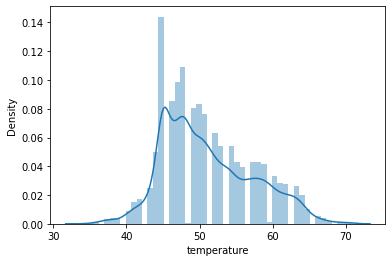

In [14]:
sns.distplot(df['temperature'],50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


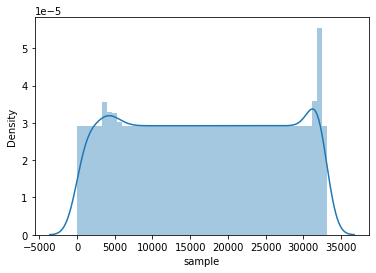

In [15]:
sns.distplot(df['sample'],50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


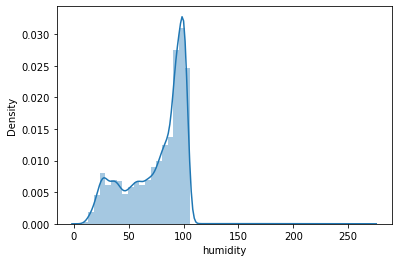

In [16]:
sns.distplot(df['humidity'],50)
plt.show()

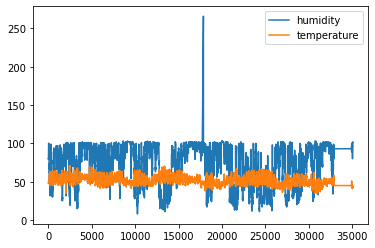

In [23]:
x = df[['humidity', 'temperature']]
x.plot()

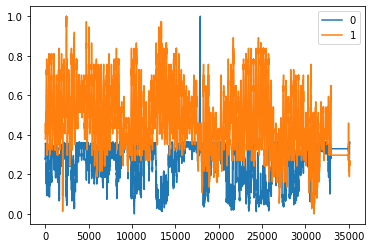

In [24]:
from sklearn.preprocessing import MinMaxScaler
## Set the scaler by fitting the dataset
norm_scaler = MinMaxScaler()
norm = norm_scaler.fit(x)
## Transform the target dataset
x_norm = norm.transform(x)
pd.DataFrame(x_norm).plot()

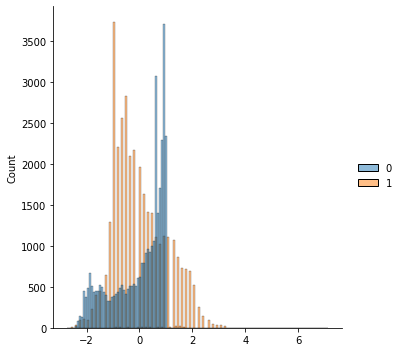

In [25]:
from sklearn.preprocessing import StandardScaler
## Set the scaler by fitting the dataset
std_scaler = StandardScaler()
standard = std_scaler.fit(x)
## Transform the target dataset
x_standard = standard.transform(x)
sns.displot(x_standard)